In [1]:
using DataFrames, PyPlot, LowRankModels, StatsBase
include("proxgrad.jl")

proxgrad_const (generic function with 1 method)

In [5]:
onehot = readtable("newTrainingWithk=14.csv")

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,MonthNumber,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33
1,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,1,1.105408676,-0.260922162,-1.165458058,-1.637289472,0.935303607,-0.859965866,-0.343400099,-1.487641508,-1.396709558,-1.446304535,-0.275197432,1.62986449,-0.747110788,-0.694724547,0.049482534,-0.168812001,939
2,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,4,-1.160518257,1.529205537,0.933987145,0.809466826,-0.868450192,1.148306336,-1.163630069,-0.322224738,-0.399556389,-0.360172987,-1.48438449,0.179615445,-0.696923965,1.894585073,-0.329474332,-0.265376426,643
3,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,6,-1.110164325,0.700442713,1.159436906,1.427334578,-0.146948673,1.566696379,-0.856043831,0.938120664,1.054014063,0.995793176,-0.514565415,-1.004729139,0.758493887,1.483621803,-0.329474332,-0.265376426,678
4,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,4,-1.160518257,1.529205537,0.933987145,0.809466826,-0.868450192,1.148306336,-1.163630069,-0.322224738,-0.399556389,-0.360172987,-1.48438449,0.179615445,-0.696923965,1.894585073,-0.329474332,-0.265376426,864
5,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,6,1.155762608,-1.730594903,-1.451503011,-0.228550998,0.110730442,-0.357897815,0.271772378,1.167994983,1.143268389,1.158098217,0.412985517,-1.010302525,1.266635465,-0.530098206,-0.329474332,-0.265376426,619
6,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,12,1.155762608,-1.730594903,-1.451503011,-0.228550998,0.110730442,-0.357897815,0.271772378,-0.816428953,-0.827044851,-0.822997508,1.702997144,0.788462949,-0.747110788,0.093457206,-0.329474332,-0.265376426,832
7,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,7,1.105408676,-0.260922162,-1.165458058,-1.637289472,0.935303607,-0.859965866,-0.343400099,1.530897237,1.560611198,1.547955057,0.91444629,-1.010302525,2.452299146,0.784020111,-0.329474332,-0.265376426,652
8,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,4,-0.656978938,0.170034506,0.560613826,-0.586914294,-1.486880066,-0.357897815,1.912232318,0.042403491,-0.087166248,-0.020154199,0.458776006,-0.282975616,-0.690650612,-0.668331301,-0.329474332,-0.265376426,838
9,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,2,-1.160518257,1.529205537,0.933987145,0.809466826,-0.868450192,1.148306336,-1.163630069,-1.803385372,-1.723040178,-1.767721629,-3.101392584,2.065012402,-0.747110788,-0.794022018,0.550246964,0.376087247,562
10,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,1,-0.656978938,0.170034506,0.560613826,-0.586914294,-1.486880066,-0.357897815,1.912232318,-1.311208493,-1.242468211,-1.280288149,0.673563321,1.403333306,-0.747110788,-0.857422614,-0.207230179,-0.265376426,759


In [6]:
onehot[:Jan] = onehot[:MonthNumber] .== 1
onehot[:Jan] = 1.0 * onehot[:Jan]
onehot[:Feb] = onehot[:MonthNumber] .== 2
onehot[:Feb] = 1.0 * onehot[:Feb]
onehot[:Mar] = onehot[:MonthNumber] .== 3
onehot[:Mar] = 1.0 * onehot[:Mar]
onehot[:Apil] = onehot[:MonthNumber] .== 4
onehot[:Apil] = 1.0 * onehot[:Apil]
onehot[:May] = onehot[:MonthNumber] .== 5
onehot[:May] = 1.0 * onehot[:May]
onehot[:June] = onehot[:MonthNumber] .== 6
onehot[:June] = 1.0 * onehot[:June]
onehot[:July] = onehot[:MonthNumber] .== 7
onehot[:July] = 1.0 * onehot[:July]
onehot[:Aug] = onehot[:MonthNumber] .== 8
onehot[:Aug] = 1.0 * onehot[:Aug]
onehot[:Sep] = onehot[:MonthNumber] .== 9
onehot[:Sep] = 1.0* onehot[:Sep]
onehot[:Oct] = onehot[:MonthNumber] .== 10
onehot[:Oct] = 1.0 * onehot[:Oct]
onehot[:Nov] = onehot[:MonthNumber] .== 11
onehot[:Nov] = 1.0 * onehot[:Nov]
onehot[:Dec] = onehot[:MonthNumber] .== 12;
onehot[:Dec] = 1.0 * onehot[:Dec];

In [7]:
onehot

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,MonthNumber,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,Jan,Feb,Mar,Apil,May,June,July,Aug,Sep,Oct,Nov,Dec
1,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,1,1.105408676,-0.260922162,-1.165458058,-1.637289472,0.935303607,-0.859965866,-0.343400099,-1.487641508,-1.396709558,-1.446304535,-0.275197432,1.62986449,-0.747110788,-0.694724547,0.049482534,-0.168812001,939,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,4,-1.160518257,1.529205537,0.933987145,0.809466826,-0.868450192,1.148306336,-1.163630069,-0.322224738,-0.399556389,-0.360172987,-1.48438449,0.179615445,-0.696923965,1.894585073,-0.329474332,-0.265376426,643,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,6,-1.110164325,0.700442713,1.159436906,1.427334578,-0.146948673,1.566696379,-0.856043831,0.938120664,1.054014063,0.995793176,-0.514565415,-1.004729139,0.758493887,1.483621803,-0.329474332,-0.265376426,678,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,4,-1.160518257,1.529205537,0.933987145,0.809466826,-0.868450192,1.148306336,-1.163630069,-0.322224738,-0.399556389,-0.360172987,-1.48438449,0.179615445,-0.696923965,1.894585073,-0.329474332,-0.265376426,864,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,6,1.155762608,-1.730594903,-1.451503011,-0.228550998,0.110730442,-0.357897815,0.271772378,1.167994983,1.143268389,1.158098217,0.412985517,-1.010302525,1.266635465,-0.530098206,-0.329474332,-0.265376426,619,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,12,1.155762608,-1.730594903,-1.451503011,-0.228550998,0.110730442,-0.357897815,0.271772378,-0.816428953,-0.827044851,-0.822997508,1.702997144,0.788462949,-0.747110788,0.093457206,-0.329474332,-0.265376426,832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,7,1.105408676,-0.260922162,-1.165458058,-1.637289472,0.935303607,-0.859965866,-0.343400099,1.530897237,1.560611198,1.547955057,0.91444629,-1.010302525,2.452299146,0.784020111,-0.329474332,-0.265376426,652,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,4,-0.656978938,0.170034506,0.560613826,-0.586914294,-1.486880066,-0.357897815,1.912232318,0.042403491,-0.087166248,-0.020154199,0.458776006,-0.282975616,-0.690650612,-0.668331301,-0.329474332,-0.265376426,838,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,-1.368494382,0.056512984,-1.210135385,1.18196807,0.036029714,0.25089733,0.216947234,-0.781162779,-1.017969629,0.151034819,-0.021513016,-1.336453217,0.313358954,-1.273283258,2,-1.160518257,1.529205537,0.933987145,0.809466826,-0.868450192,1.148306336,-1.163630069,-1.803385372,-1.723040178,-1.767721629,-3.101392584,2.065012402,-0.747110788,-0.794022018,0.55

In [9]:
XGLRM = hcat(convert(Array{Float64,2},onehot[:,1:15]),convert(Array{Float64,2},onehot[:,17:32]),
convert(Array{Float64,2},onehot[:,34:45]))
yGLRM = onehot[:,33].data;

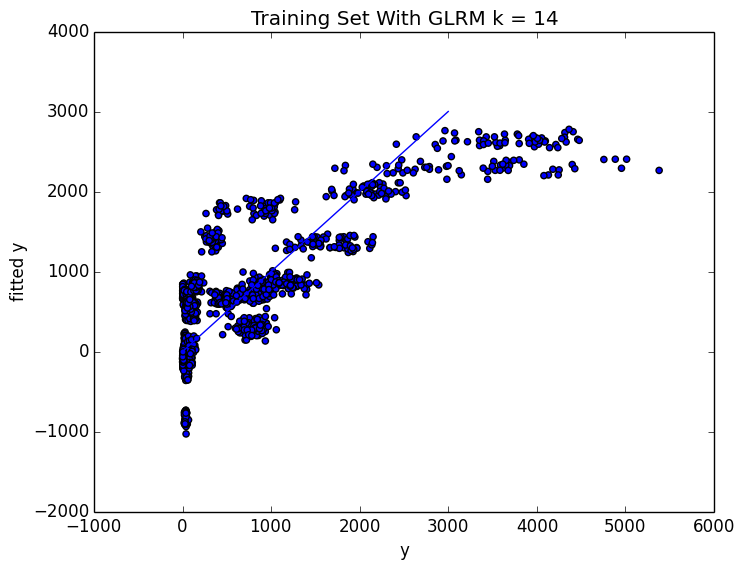

mean((yGLRM - yfitGLRM) .^ 2) = 360698.33727824735


PyObject <matplotlib.text.Text object at 0x3122562d0>

In [11]:
#wGLRM = proxgrad_linesearch(QuadLoss(), QuadReg(1) ,XGLRM, yGLRM; stepsize=0.1, maxiters = 500000)
#yfitGLRM = XGLRM * wGLRM
@show mean((yGLRM - yfitGLRM).^2)
PyPlot.scatter(yGLRM,yfitGLRM)
PyPlot.plot(1:3000,1:3000)
PyPlot.xlabel("y")
PyPlot.ylabel("fitted y")
PyPlot.title("Training Set With GLRM k = 14")

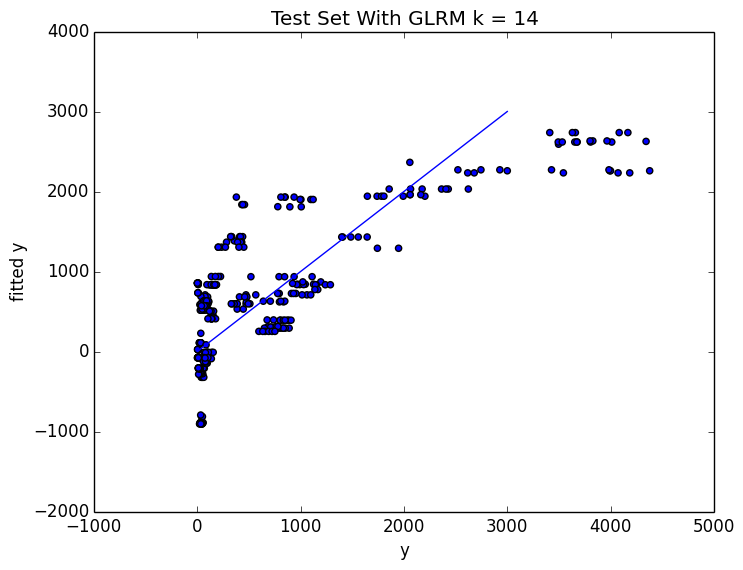

mean((ytestGLRM - yfittestGLRM) .^ 2) = 404466.94465039956


PyObject <matplotlib.text.Text object at 0x321719e10>

In [12]:
testdataframe = readtable("newTestingWithk=14.csv")
testdataframe[:Jan] = testdataframe[:MonthNumber] .== 1
testdataframe[:Jan] = 1.0 * testdataframe[:Jan]
testdataframe[:Feb] = testdataframe[:MonthNumber] .== 2
testdataframe[:Feb] = 1.0 * testdataframe[:Feb]
testdataframe[:Mar] = testdataframe[:MonthNumber] .== 3
testdataframe[:Mar] = 1.0 * testdataframe[:Mar]
testdataframe[:Apil] = testdataframe[:MonthNumber] .== 4
testdataframe[:Apil] = 1.0 * testdataframe[:Apil]
testdataframe[:May] = testdataframe[:MonthNumber] .== 5
testdataframe[:May] = 1.0 * testdataframe[:May]
testdataframe[:June] = testdataframe[:MonthNumber] .== 6
testdataframe[:June] = 1.0 * testdataframe[:June]
testdataframe[:July] = testdataframe[:MonthNumber] .== 7
testdataframe[:July] = 1.0 * testdataframe[:July]
testdataframe[:Aug] = testdataframe[:MonthNumber] .== 8
testdataframe[:Aug] = 1.0 * testdataframe[:Aug]
testdataframe[:Sep] = testdataframe[:MonthNumber] .== 9
testdataframe[:Sep] = 1.0* testdataframe[:Sep]
testdataframe[:Oct] = testdataframe[:MonthNumber] .== 10
testdataframe[:Oct] = 1.0 * testdataframe[:Oct]
testdataframe[:Nov] = testdataframe[:MonthNumber] .== 11
testdataframe[:Nov] = 1.0 * testdataframe[:Nov]
testdataframe[:Dec] = testdataframe[:MonthNumber] .== 12;
testdataframe[:Dec] = 1.0 * testdataframe[:Dec];

XtestGLRM = hcat(convert(Array{Float64,2},testdataframe[:,1:15]),convert(Array{Float64,2},testdataframe[:,17:32]),
convert(Array{Float64,2},testdataframe[:,34:45]))
ytestGLRM = testdataframe[:,33].data;
yfittestGLRM = XtestGLRM*wGLRM
@show mean((ytestGLRM - yfittestGLRM).^2)
PyPlot.scatter(ytestGLRM,yfittestGLRM)
PyPlot.plot(1:3000,1:3000)
PyPlot.xlabel("y")
PyPlot.ylabel("fitted y")
PyPlot.title("Test Set With GLRM k = 14")